Бланк Даниил 09-314

# Символы и строки: группа String

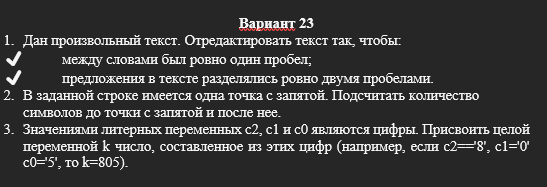

1 задание:

In [ ]:
def formatText(text):
    words = text.split()
    text = ' '.join(words)
    for symbol in ('.', '!', '?'):
        text = text.replace(symbol + ' ', symbol + '  ')
        text = text.replace(symbol + '  ', symbol + '  ')
    return text
inputText = 'Пример   текста.  Между   словами   много пробелов.    Между предложениями   не два пробела.'
formattedText = formatText(inputText)
print(formattedText)

Пример текста.  Между словами много пробелов.  Между предложениями не два пробела.


2 задание:

In [ ]:
def countSymbols(text):
  parts = text.split(';', 1)
  if len(parts) < 2:
    return None
  return len(parts[0]), len(parts[1])

inputString = 'В первой половине 29 символов;А во второй 14'
before, after = countSymbols(inputString)
print(f'До ";" {before} символов, после - {after}.')

До ";" 29 символов, после - 14.


3 задание:

In [ ]:
c2 = input(str('Введите c2: '))
c1 = input(str('Введите c1: '))
c0 = input(str  ('Введите c0: '))
k = c2 + c1 + c0
print(k)

Введите c2: 2
Введите c1: 0
Введите c0: 5
205


# Текстовые файлы: группа Text

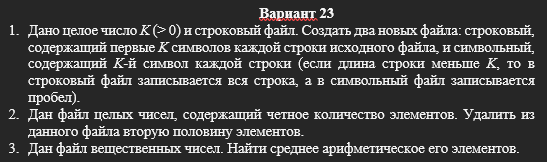

1 задание:

In [ ]:
!pip install faker
from faker import Faker
import random

# Инициализация Faker
fake = Faker()

# Функция для генерации случайного текста
def generate_random_text():
    return fake.text(max_nb_chars=random.randint(50, 200))

# Функция для создания файла и записи данных
def create_file(file_name, num_lines=10):
    with open(file_name, 'w', encoding='utf-8') as file:
        for _ in range(num_lines):
            file.write(generate_random_text() + '\n')

if __name__ == "__main__":
    # Укажите имя файла и количество строк
    file_name = "generated_file.txt"
    num_lines = 5  # Количество строк в файле

    # Создание файла
    create_file(file_name, num_lines)
    print(f"Файл '{file_name}' успешно создан с {num_lines} строками случайного текста.")

def process_file(input_filename, output_str_filename, output_char_filename, K):
    with open(input_filename, 'r', encoding='utf-8') as input_file, \
         open(output_str_filename, 'w', encoding='utf-8') as str_file, \
         open(output_char_filename, 'w', encoding='utf-8') as char_file:

        for line in input_file:
            line = line.rstrip('\n')

            if len(line) >= K:
                str_file.write(line[:K] + '\n')
            else:
                str_file.write(line + '\n')

            if len(line) >= K:
                char_file.write(line[K-1])
            else:
                char_file.write(' ')

with open('output_str.txt', 'w') as f:
    pass
with open('output_char.txt', 'w') as f:
    pass

K = int(input("Введите K: "))
input_filename = 'generated_file.txt'
output_str_filename = 'output_str.txt'
output_char_filename = 'output_char.txt'

process_file(input_filename, output_str_filename, output_char_filename, K)
with open('output_str.txt', 'r', encoding='utf-8') as file:
    content = file.read()
    print(content)
with open('output_char.txt', 'r', encoding='utf-8') as file:
    content2 = file.read()
    print(content2)

Файл 'generated_file.txt' успешно создан с 5 строками случайного текста.
Введите K: 3
Inc
Ani
Ser
Det
Sta
If 
Bac

cirta c


2 задание:

In [ ]:
import random
with open('numbers.txt', 'w') as f:
    for _ in range(10):
      digit = random.randint(0,99)
      f.write(f'{digit}\n')

def removeSecondHalf(input_filename, output_filename):
    with open(input_filename, 'r') as file:
        numbers = [int(line.strip()) for line in file if line.strip()]

    half_length = len(numbers) // 2
    first_half = numbers[:half_length]

    with open(output_filename, 'w') as file:
        for number in first_half:
            file.write(f"{number}\n")

input_filename = 'numbers.txt'
output_filename = 'numbers_half.txt'
removeSecondHalf(input_filename, output_filename)
with open('numbers_half.txt', 'r', encoding='utf-8') as file:
    content = file.read()
    print(content)

73
47
18
3
80



3 задание:

In [ ]:
from random import random
with open('numbers.txt', 'w') as f:
    for _ in range(10):
      digit = random()
      f.write(f'{digit}\n')

def calculate_average(filename):
    total = 0.0
    count = 0

    with open(filename, 'r') as file:
        for line in file:
            try:
                number = float(line)
                total += number
                count += 1
            except ValueError:
                print(f"Не удалось преобразовать строку '{line.strip()}' в число")

    if count == 0:
        return None

    return total / count

filename = 'numbers.txt'
average = calculate_average(filename)

if average is not None:
    print(f"Среднее арифметическое: {average:.4f}")
else:
    print("Файл не содержит чисел")

Среднее арифметическое: 0.5882


# Тест

In [ ]:
import random
import datetime
import os

class Question:
    def __init__(self, text, options, correct_answer):
        self.text = text
        self.options = options
        self.correct_answer = correct_answer

    def shuffle_options(self):
        if not self.options:
            return

        correct_text = self.options[self.correct_answer]

        random.shuffle(self.options)

        try:
            self.correct_answer = self.options.index(correct_text)
        except ValueError:
            self.correct_answer = 0

    def check_answer(self, user_answer):
        return 1 <= user_answer <= len(self.options) and user_answer - 1 == self.correct_answer

class TestSystem:
    def __init__(self):
        self.questions = []
        self.score = 0
        self.start_time = None
        self.end_time = None

    def load_questions(self, filename):
        try:
            with open(filename, 'r', encoding='utf-8') as file:
                for line_num, line in enumerate(file, 1):
                    line = line.strip()
                    if not line or line.startswith('#'):
                        continue

                    parts = line.split('|')
                    if len(parts) != 7:
                        print(f"Ошибка в строке {line_num}: требуется 7 частей, разделенных |")
                        continue

                    text = parts[0].strip()
                    options = [opt.strip() for opt in parts[1:6]]
                    correct_answer = parts[6].strip()

                    try:
                        if correct_answer in options:
                            correct_index = options.index(correct_answer)
                        else:
                            answer_num = int(correct_answer)
                            if 1 <= answer_num <= 5:
                                correct_index = answer_num - 1
                            else:
                                print(f"Ошибка в строке {line_num}: номер ответа должен быть 1-5")
                                continue
                    except ValueError:
                        print(f"Ошибка в строке {line_num}: правильный ответ не найден среди вариантов")
                        continue

                    self.questions.append(Question(text, options, correct_index))

            if not self.questions:
                print("Не загружено ни одного вопроса")
                return False

            print(f"Успешно загружено {len(self.questions)} вопросов")
            return True

        except FileNotFoundError:
            print(f"Файл {filename} не найден")
            return False
        except Exception as e:
            print(f"Ошибка при загрузке вопросов: {e}")
            return False

    def shuffle_questions(self):
        random.shuffle(self.questions)
        for question in self.questions:
            question.shuffle_options()

    def run_test(self):
        if not self.questions:
            print("Нет вопросов для тестирования")
            return

        self.start_time = datetime.datetime.now()
        print("\nТестирование начато!")
        print(f"Всего вопросов: {len(self.questions)}\n")

        for i, question in enumerate(self.questions, 1):
            print(f"\nВопрос {i}/{len(self.questions)}: {question.text}")
            for j, option in enumerate(question.options, 1):
                print(f"{j}. {option}")

            while True:
                answer = input("Ваш ответ (1-5): ").strip()
                if answer.isdigit():
                    answer = int(answer)
                    if 1 <= answer <= 5:
                        break
                print("Пожалуйста, введите число от 1 до 5")

            if question.check_answer(answer):
                print("Правильно!")
                self.score += 1
            else:
                print(f"Неправильно. Правильный ответ: {question.correct_answer + 1}")

        self.end_time = datetime.datetime.now()
        self.show_results()
        self.save_results()

    def show_results(self):
        total = len(self.questions)
        percentage = (self.score / total) * 100 if total > 0 else 0

        print("\nТестирование завершено!")
        print(f"Время начала: {self.start_time}")
        print(f"Время окончания: {self.end_time}")
        print(f"Всего вопросов: {total}")
        print(f"Правильных ответов: {self.score}")
        print(f"Процент правильных: {percentage:.2f}%")

    def save_results(self):
        os.makedirs('results', exist_ok=True)
        filename = f"results/results_{self.start_time.strftime('%Y%m%d_%H%M%S')}.txt"

        with open(filename, 'w', encoding='utf-8') as f:
            f.write(f"Время начала: {self.start_time}\n")
            f.write(f"Время окончания: {self.end_time}\n")
            f.write(f"Всего вопросов: {len(self.questions)}\n")
            f.write(f"Правильных ответов: {self.score}\n")
            f.write(f"Процент правильных: {(self.score/len(self.questions))*100:.2f}%\n")

        print(f"Результаты сохранены в {filename}")

def main():
    print("Программа тестирования")
    print("----------------------")

    test = TestSystem()

    while True:
        filename = input("Введите имя файла с вопросами (по умолчанию questions.txt): ") or "questions.txt"
        if test.load_questions(filename):
            break

    test.shuffle_questions()
    input("\nНажмите Enter чтобы начать...")
    test.run_test()

if __name__ == "__main__":
    main()

Файл с вопросами (questions.txt):

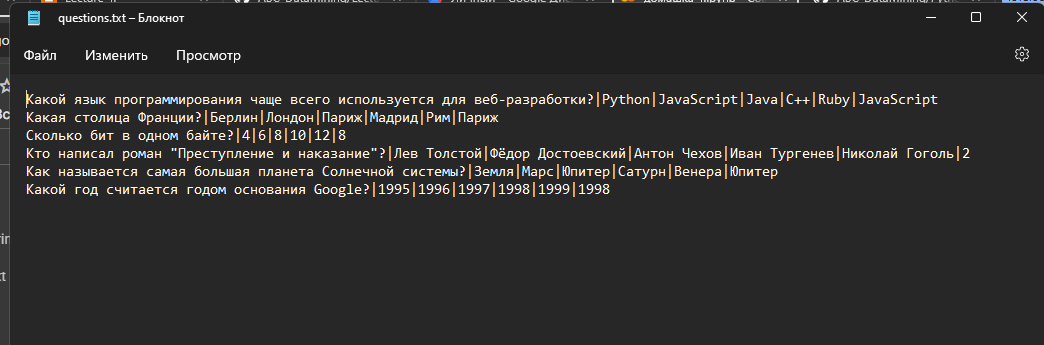

Файл с результатами (results.txt) в папке results:

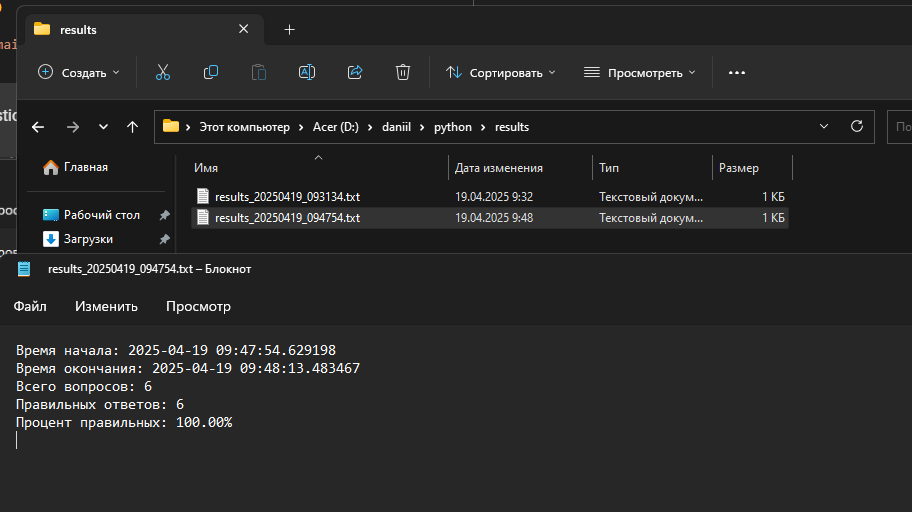